In [1]:
import pandas as pd
attrition_past=pd.read_csv('attrition_past.csv')

C:\Users\Bhagavan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
print(attrition_past.head())

  corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
0        abcd                  78               1024                   12   
1        asdf                  14               2145                   20   
2        xyzz                 182               3891                   35   
3        acme                 101              10983                    2   
4        qwer                   0                118                   42   

   exited  
0       1  
1       0  
2       0  
3       1  
4       1  


In [3]:
print(attrition_past['exited'].mean())

0.5769230769230769


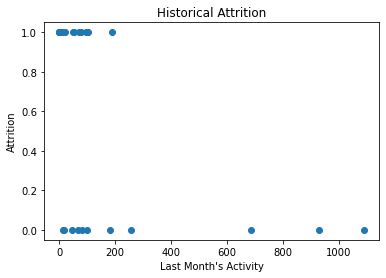

In [4]:
from matplotlib import pyplot as plt
plt.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'])
plt.title('Historical Attrition')
plt.xlabel('Last Month\'s Activity')
plt.ylabel('Attrition')
plt.show()

In [6]:
x=attrition_past['lastmonth_activity'].values.reshape(-1,1)
y=attrition_past['exited'].values.reshape(-1,1)
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x,y)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


LinearRegression()

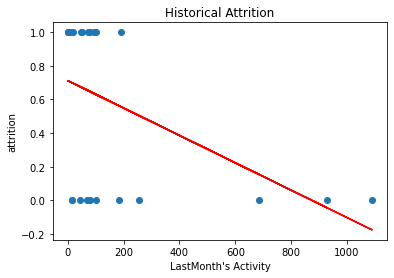

In [19]:
from matplotlib import pyplot as plt
plt.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'])
prediction=[regressor.coef_[0]*x+regressor.intercept_[0] for x in \
list(attrition_past['lastmonth_activity'].values)]
plt.plot(attrition_past['lastmonth_activity'].values, prediction, color='red')
plt.title('Historical Attrition')
plt.xlabel('LastMonth\'s Activity')
plt.ylabel('attrition')
plt.show()

In [20]:
attrition_past['predicted']=regressor.predict(x)

In [22]:
attrition_future=pd.read_csv('attrition2.csv')

In [23]:
attrition_future.head()

,corporation,lastmonth_activity,lastyear_activity,number_of_employees
0,hhtn,166,1393,91
1,slfm,824,16920,288
2,pryr,68,549,12
3,ahva,121,1491,16
4,dmai,4,94,2


In [24]:
x=attrition_future['lastmonth_activity'].values.reshape(-1,1)
attrition_future['predicted']=regressor.predict(x)

In [25]:
attrition_future.head()

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,predicted
0,hhtn,166,1393,91,0.576641
1,slfm,824,16920,288,0.040352
2,pryr,68,549,12,0.656514
3,ahva,121,1491,16,0.613317
4,dmai,4,94,2,0.708676


In [26]:
print(attrition_future.nlargest(5,'predicted'))

   corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
8         whsh                   0                 40                   52   
12        mike                   0                  0                   49   
24        pian                   0                 12                   19   
21        bass                   2                 19                 1400   
4         dmai                   4                 94                    2   

    predicted  
8    0.711936  
12   0.711936  
24   0.711936  
21   0.710306  
4    0.708676  


In [28]:
print(attrition_future.sort_values(by='predicted',ascending=False).loc[:,'corporation'])

8     whsh
24    pian
12    mike
21    bass
13    pevc
4     dmai
22    ynus
10    kdic
25    hlpd
17    angl
14    erin
9     oscr
7     grce
18    zamk
23    hlly
15    xkcd
19    dwgt
2     pryr
5     skct
6     frgv
11    ejdc
3     ahva
20    wlcj
0     hhtn
1     slfm
16    cred
Name: corporation, dtype: object


In [29]:
print(list(attrition_future.loc[attrition_future['predicted']>0.7,'corporation']))

['dmai', 'whsh', 'oscr', 'kdic', 'mike', 'pevc', 'erin', 'angl', 'bass', 'ynus', 'pian', 'hlpd']


In [30]:
themedian=attrition_past['predicted'].median()
prediction=list(1*(attrition_past['predicted']>themedian))
actual=list(attrition_past['exited'])

In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(prediction,actual))

[[7 6]
 [4 9]]


In [57]:
conf_mat=confusion_matrix(prediction,actual)
precision=conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
recall=conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
print(precision)
print(recall)

0.6923076923076923
0.8181818181818182


In [33]:
x3=attrition_past.loc[:,['lastmonth_activity','lastyear_activity', \
'number_of_employees']].values.reshape(-1,3)
y=attrition_past['exited'].values.reshape(-1,1)
regressor_multi=LinearRegression()
regressor_multi.fit(x3,y)

LinearRegression()

In [34]:
attrition_future['predicted_multi']=regressor_multi.predict(x3)

In [35]:
print(attrition_future.nlargest(5,'predicted_multi'))

   corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
11        ejdc                  95               1005                   61   
12        mike                   0                  0                   49   
13        pevc                   4                  6                 1686   
4         dmai                   4                 94                    2   
22        ynus                   9                 90                   12   

    predicted  predicted_multi  
11   0.634508         0.870000  
12   0.711936         0.815677  
13   0.708676         0.788110  
4    0.708676         0.755625  
22   0.704600         0.715362  


In [36]:
print(list(attrition_future.sort_values(by='predicted_multi', \
ascending=False).loc[:,'corporation']))

['ejdc', 'mike', 'pevc', 'dmai', 'ynus', 'wlcj', 'angl', 'pian', 'slfm', 'hlpd', 'frgv', 'hlly', 'oscr', 'cred', 'dwgt', 'hhtn', 'whsh', 'grce', 'pryr', 'xkcd', 'bass', 'ahva', 'erin', 'zamk', 'skct', 'kdic']


In [39]:
attrition_future['activity_per_employee']=attrition_future.loc[:, \
'lastmonth_activity']/attrition_future.loc[:,'number_of_employees']

In [43]:
attrition_past['activity_per_employee']=attrition_past.loc[:, \
'lastmonth_activity']/attrition_past.loc[:,'number_of_employees']
x=attrition_past.loc[:,['activity_per_employee','lastmonth_activity', \
'lastyear_activity','number_of_employees']].values.reshape(-1,4)
y=attrition_past['exited'].values.reshape(-1,1)
regressor_derived=LinearRegression()
regressor_derived.fit(x,y)
attrition_past['predicted3']=regressor_derived.predict(x)
x=attrition_future.loc[:,['activity_per_employee','lastmonth_activity', \
'lastyear_activity','number_of_employees']].values.reshape(-1,4)
attrition_future['predicted3']=regressor_derived.predict(x)

In [45]:
print(list(attrition_future.sort_values(by='predicted3',ascending=False).loc[:,'corporation']))

['pevc', 'bass', 'frgv', 'hlpd', 'angl', 'oscr', 'zamk', 'whsh', 'mike', 'hhtn', 'ejdc', 'grce', 'pian', 'ynus', 'dmai', 'kdic', 'erin', 'slfm', 'dwgt', 'pryr', 'hlly', 'xkcd', 'skct', 'ahva', 'wlcj', 'cred']


In [46]:
themedian=attrition_past['predicted3'].median()
prediction=list(1*(attrition_past['predicted3']>themedian))
actual=list(attrition_past['exited'])

In [47]:
print(confusion_matrix(prediction,actual))

[[ 9  4]
 [ 2 11]]


In [48]:
conf_mat=confusion_matrix(prediction,actual)
precision=conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
recall=conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])

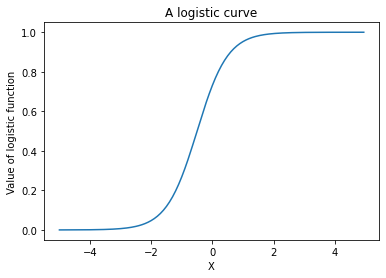

In [50]:
from matplotlib import pyplot as plt
import numpy as np
import math
x=np.arange(-5,5,0.05)
y=(1/(1+np.exp(-1-2*x)))
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel('Value of logistic function')
plt.title('A logistic curve')
plt.show()

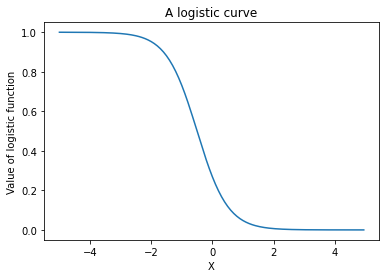

In [51]:
from matplotlib import pyplot as plt
import numpy as np
import math
x=np.arange(-5,5,0.05)
y=(1/(1+np.exp(1+2*x)))
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel('Value of logistic function')
plt.title('A logistic curve')
plt.show()

In [52]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear',random_state=0)
x=attrition_past['lastmonth_activity'].values.reshape(-1,1)
y=attrition_past['exited']
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [53]:
attrition_past['logisticprediction']=model.predict_proba(x)[:,-1]

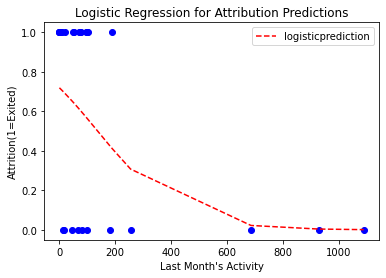

In [55]:
fig=plt.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'],color='blue')
attrition_past.sort_values('lastmonth_activity').plot('lastmonth_activity', \
'logisticprediction',ls='--',ax=fig.axes,color='red')
plt.title('Logistic Regression for Attribution Predictions')
plt.xlabel('Last Month\'s Activity')
plt.ylabel('Attrition(1=Exited)')
plt.show()

In [56]:
x=attrition_future['lastmonth_activity'].values.reshape(-1,1)
attrition_future['logisticprediction']=model.predict_proba(x)[:,1]
print(list(attrition_future.sort_values(by='logisticprediction', \
ascending=False).loc[:,'corporation']))

['whsh', 'pian', 'mike', 'bass', 'pevc', 'dmai', 'ynus', 'kdic', 'hlpd', 'angl', 'erin', 'oscr', 'grce', 'zamk', 'hlly', 'xkcd', 'dwgt', 'pryr', 'skct', 'frgv', 'ejdc', 'ahva', 'wlcj', 'hhtn', 'slfm', 'cred']
